# Data Preparation
## Merge Datasets

In [40]:
# import libraries and adjust settings
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# set pyplot style
plt.style.use('fivethirtyeight') 

# Render our plots inline
%matplotlib inline

# set figure size
plt.rcParams['figure.figsize'] = (15, 8)

# load datasets
inPath = r'data/'
df_CPI = pd.read_csv(inPath+'preprocessed/exp_CountriesCPI.csv')
df_COVID = pd.read_csv(inPath+'preprocessed/exp_keyCountriesCovid.csv')
df_UNEMPLOYMENT = pd.read_csv(inPath+'preprocessed/exp_keyCountriesUnemployment.csv')
df_GDP = pd.read_csv(inPath+'preprocessed/exp_worldGDP.csv')
df_REF = pd.read_csv(inPath+'covid/reference.csv')


### Previewing imported datasets

In [41]:
# Note: Just Germany
df_CPI.head()

,Year,Months,import_prices_index,Change on previous month in(%),Change on previous year's month in(%),export_prices_index,Change on previous month in(%).1,Change on previous year's month in(%).1,Consumer price index,Change on previous year's month in(%).2,Change on previous month in(%).2
0,2019,January,102.2,-0.2,0.8,102.2,0.1,1.1,103.4,1.4,-0.8
1,2019,February,102.5,0.3,1.6,102.3,0.1,1.3,103.8,1.5,0.4
2,2019,March,102.5,-,1.7,102.4,0.1,1.3,104.2,1.3,0.4
3,2019,April,102.8,0.3,1.4,102.6,0.2,1.3,105.2,2,1
4,2019,May,102.7,-0.1,-0.2,102.5,-0.1,0.7,105.4,1.4,0.2


In [42]:
df_COVID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    72 non-null     int64  
 1   location                72 non-null     object 
 2   month                   72 non-null     int64  
 3   Monthly_new_cases       72 non-null     float64
 4   Monthly_total_cases     72 non-null     float64
 5   Percentage Growth Rate  71 non-null     float64
 6   PG_Rate                 71 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 4.1+ KB


In [43]:
df_UNEMPLOYMENT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      72 non-null     int64  
 1   Country                    72 non-null     object 
 2   Unemployment_Rate_Percent  67 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB


In [44]:
df_GDP.head()

,TIME,GEO,GDP
0,2010Q3,European Union - 27 countries (from 2020),2737806.5
1,2010Q3,European Union - 28 countries (2013-2020),3219688.1
2,2010Q3,Euro area - 19 countries (from 2015),2372179.6
3,2010Q3,Belgium,88635.0
4,2010Q3,Bulgaria,10342.2


### Merge: covid <--> unemployment

In [45]:
# tables are joined on date and location, therefore check location description first
print (df_COVID.location.unique())
print (df_UNEMPLOYMENT.Country.unique())

# write out abbreviations UK and US in their full length within df_UNEMPLOYMENT
df_UNEMPLOYMENT['Country'] = df_UNEMPLOYMENT['Country'].replace({'USA':'United States'})
df_UNEMPLOYMENT['Country'] = df_UNEMPLOYMENT['Country'].replace({'UK':'United Kingdom'})

# create new dataframe which is supposed to hold merged data
df_MERGED = df_COVID
df_MERGED['Unemployment_Rate_Percent'] = np.NaN

# set values of new dataframes's column Unemployment_Rate_Percent 
# joining where year, location and month match
for srcIndex, srcRow in df_MERGED.iterrows():
    srcLocation = srcRow['location']
    srcMonth = srcRow['month']
    for tgIndex, tgRow in df_UNEMPLOYMENT.iterrows():
        if (srcLocation == tgRow['Country'] and srcMonth == tgRow['Month']):
           df_MERGED.loc[srcIndex,'Unemployment_Rate_Percent'] = tgRow['Unemployment_Rate_Percent']
df_MERGED



['China' 'Germany' 'India' 'Italy' 'United Kingdom' 'United States']
['Germany' 'India' 'China' 'Italy' 'USA' 'UK']


,year,location,month,Monthly_new_cases,Monthly_total_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
0,2020,China,1,9254.0,9802.0,NaN,NaN,5.3
1,2020,China,2,69554.0,79356.0,651.610115,651.610115,6.2
2,2020,China,3,2923.0,82279.0,-95.797510,-95.797510,5.9
3,2020,China,4,1677.0,83956.0,-42.627438,-42.627438,6.0
4,2020,China,5,190.0,84146.0,-88.670244,-88.670244,5.9
...,...,...,...,...,...,...,...,...
67,2020,United States,8,1458899.0,6025355.0,-24.200596,-24.200596,7.8
68,2020,United States,9,1206247.0,7231602.0,-17.317991,-17.317991,6.9
69,2020,United States,10,1926777.0,9158379.0,59.733206,59.733206,6.7
70,2020,United States,11,4496140.0,13654519.0,133.350305,133.350305,6.7


### Merge: covid, umemployment <--> GDP

In [67]:
# tables are joined on location and time
print (df_MERGED.location.unique())
print (df_GDP.GEO.unique())

# 1st step: remove everything in brackets in column GEO and strip whitespaces
df_GDP.GEO = df_GDP.GEO.replace(to_replace=r'\((.*?)\)',value='',regex=True)

# 2nd step: reduce df_GDP to year 2020
df_GDP = df_GDP[df_GDP.TIME.str.contains(r'(2020)')]

# 3rd step: create subselection with key-countries
df_GDP = df_GDP[df_GDP.GEO.str.contains(r'(China|Germany|India|Italy|United Kingdom|United States)')]
df_GDP.GEO = df_GDP.GEO.str.rstrip() # remove whitesoace after Germany
df_GDP.GEO = df_GDP.GEO.replace(to_replace='China including Hong Kong',value='China')

# 4th step: add new column which is supposed to hold GDP value
df_MERGED['GDP'] = ''

# 5th step: set values of new column GDP
# Problem: GDP Value exists only quarterly -> Solution: fill every month with corresponding value of quarter
Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9] # remark: no Data for 2020Q4

for srcIndex, srcRow in df_MERGED.iterrows():
    srcLocation = srcRow['location']
    srcMonth = srcRow['month']
    for tgIndex, tgRow in df_GDP.iterrows():
        if (srcLocation == tgRow['GEO'] and srcMonth in Q1 and tgRow['TIME']=='2020Q1'):
           df_MERGED.loc[srcIndex,'GDP'] = tgRow.GDP
        elif (srcLocation == tgRow['GEO'] and srcMonth in Q2 and tgRow['TIME']=='2020Q2'):
           df_MERGED.loc[srcIndex,'GDP'] = tgRow.GDP
        elif (srcLocation == tgRow['GEO'] and srcMonth in Q3 and tgRow['TIME']=='2020Q3'):
           df_MERGED.loc[srcIndex,'GDP'] = tgRow.GDP

# 6th step: convert GDP to numeric
df_MERGED.GDP = df_MERGED.GDP.apply(pd.to_numeric)

# add GDP per capita for easier comparison 
# GDP / Population
df_MERGED['GDP per capita'] = np.NaN

for srcIndex, srcRow in df_MERGED.iterrows():
    if (srcRow['location'] == 'United States'):
        pop = df_REF.loc[df_REF['Combined_Key']=='US'].Population.values[0]
        gdp = srcRow.GDP
        df_MERGED.loc[srcIndex,'GDP per capita'] = gdp / pop
    else:
        pop = df_REF.loc[df_REF['Combined_Key']==srcRow['location']].Population.values[0]
        gdp = srcRow.GDP 
        df_MERGED.loc[srcIndex,'GDP per capita'] = gdp / pop

# new Column with GDP Change Rate
def calc_rate(df):
    if (df[['month']!=1]):
        return df['GDP']-df['GDP'].shift()
    else:
        return 0

#df_grow['GDP_growth_rate'] = df_MERGED.groupby(['year','location','month']).apply(calc_rate).reset_index()
df_MERGED['GDP_growth_rate'] = df_MERGED['GDP']-df_MERGED['GDP'].shift()

df_aggr_covid19_data['PG_Rate']= (df_aggr_covid19_data['Monthly_new_cases'] - df_aggr_covid19_data['Monthly_new_cases'].shift(1)) * 100/ df_aggr_covid19_data['Monthly_new_cases'].shift(1)



#if (df_MERGED[['month']!=1]):
#    df_MERGED['GDP_growth_rate'] = (df_MERGED['GDP']-df_MERGED['GDP'].shift())
df_MERGED

['China' 'Germany' 'India' 'Italy' 'United Kingdom' 'United States']
['Germany' 'Italy' 'United Kingdom' 'United States' 'China' 'India']


,year,location,month,Monthly_new_cases,Monthly_total_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent,GDP,GDP per capita,GDP_growth_rate
0,2020,China,1,9254.0,9802.0,NaN,NaN,5.3,2683407.4,0.001910,NaN
1,2020,China,2,69554.0,79356.0,651.610115,651.610115,6.2,2683407.4,0.001910,100.000000
2,2020,China,3,2923.0,82279.0,-95.797510,-95.797510,5.9,2683407.4,0.001910,100.000000
3,2020,China,4,1677.0,83956.0,-42.627438,-42.627438,6.0,3203254.4,0.002280,119.372645
4,2020,China,5,190.0,84146.0,-88.670244,-88.670244,5.9,3203254.4,0.002280,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
67,2020,United States,8,1458899.0,6025355.0,-24.200596,-24.200596,7.8,4554429.8,0.013824,100.000000
68,2020,United States,9,1206247.0,7231602.0,-17.317991,-17.317991,6.9,4554429.8,0.013824,100.000000
69,2020,United States,10,1926777.0,9158379.0,59.733206,59.733206,6.7,NaN,NaN,NaN
70,2020,United States,11,4496140.0,13654519.0,133.350305,133.350305,6.7,NaN,NaN,NaN


## Visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       72 non-null     int64  
 1   location                   72 non-null     object 
 2   month                      72 non-null     int64  
 3   Monthly_new_cases          72 non-null     float64
 4   Monthly_total_cases        72 non-null     float64
 5   Percentage Growth Rate     71 non-null     float64
 6   PG_Rate                    71 non-null     float64
 7   Unemployment_Rate_Percent  67 non-null     float64
 8   GDP                        54 non-null     float64
 9   GDP per capita             54 non-null     float64
dtypes: float64(7), int64(2), object(1)
memory usage: 5.8+ KB


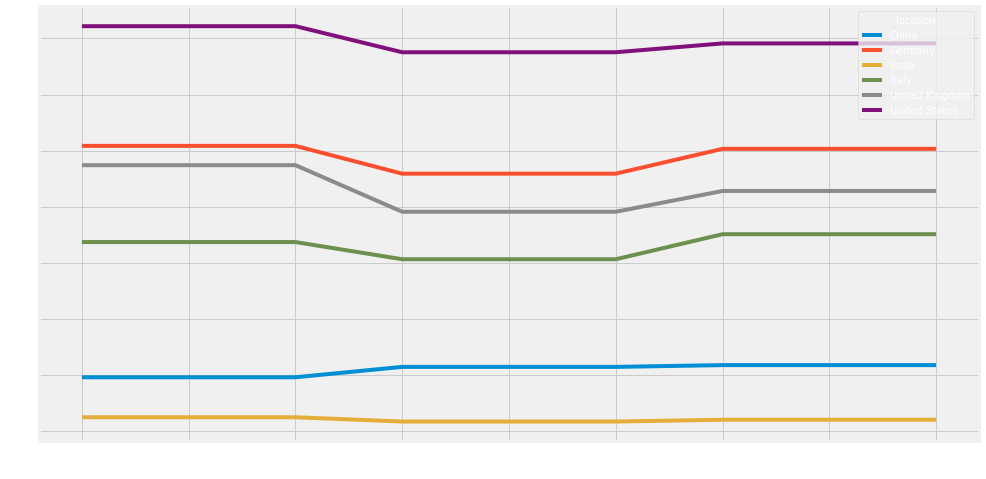

location,China,Germany,India,Italy,United Kingdom,United States
month,,,,,,
1,5.3,3.4,7.22,9.6,3.9,3.5
2,6.2,3.6,7.76,9.4,3.9,4.4
3,5.9,3.8,8.75,8.5,3.9,14.8
4,6.0,4.0,23.52,7.4,3.9,13.3
5,5.9,4.2,21.73,8.7,3.8,11.1
6,5.7,4.3,10.18,9.3,4.0,10.2
7,5.7,4.4,7.40,9.8,4.4,8.4
8,5.6,4.5,8.35,9.7,4.7,7.8
9,5.4,4.5,6.67,9.5,4.9,6.9


In [47]:
# 1. get data
# 2. plt.plot(x,y, color='', linestyle='', marker='',label='label)
# 3. set labels: plt.xlabel('') and plt.ylabel('')
# 4. set title: plt.title('')
# 5. set legend: plt.legend() -> uses labels
# 6. plt.grid(True)
# 7. plt.savefig('filename.png')
# 8. plt.show()
df_MERGED.info()
axis_x = (df_MERGED.month.unique())
pivGDP = df_MERGED.pivot(index='month',columns='location',values='GDP')
pivGDPpCap = df_MERGED.pivot(index='month',columns='location',values='GDP per capita')
pivUnemployment = df_MERGED.pivot(index='month',columns='location',values='Unemployment_Rate_Percent')
pivCovid = df_MERGED.pivot(index='month',columns='location',values='Monthly_new_cases')

pivGDPpCap.plot()
plt.show()
pivUnemployment


# Export as csv

In [48]:
outPath = r'../project/data/preprocessed/'
df_MERGED.to_csv(outPath+'exp_mergedData.csv', sep=',', index=False)